# 3. Compustat - Capital IQ

### **0. Connect to WRDS**



In [5]:
import pandas as pd
import wrds
import numpy as np

db = wrds.Connection(wrds_username='')

Loading library list...
Done


### 1. BP Application


In [6]:
df = db.raw_sql("""
                        SELECT secd.isin, secd.datadate, secd.conm,
                        secd.ajexdi, secd.prccd, secd.trfd, 
                        secd.cshoc, secd.gind 
                        FROM comp_global_daily.g_secd as secd
                        WHERE secd.datadate >= '2010-01-01'
                        AND secd.isin = 'GB0007980591'
                        order by datadate;
                        """,
                        date_cols=['datadate'])

print(df[["isin", "datadate", "conm", "prccd", "gind"]])

              isin   datadate    conm   prccd    gind
0     GB0007980591 2010-01-04  BP PLC  6.1360  101020
1     GB0007980591 2010-01-05  BP PLC  6.2010  101020
2     GB0007980591 2010-01-06  BP PLC  6.1940  101020
3     GB0007980591 2010-01-07  BP PLC  6.2330  101020
4     GB0007980591 2010-01-08  BP PLC  6.2170  101020
...            ...        ...     ...     ...     ...
3845  GB0007980591 2024-09-30  BP PLC  3.9170  101020
3846  GB0007980591 2024-10-01  BP PLC  4.0100  101020
3847  GB0007980591 2024-10-02  BP PLC  4.0660  101020
3848  GB0007980591 2024-10-03  BP PLC  4.0900  101020
3849  GB0007980591 2024-10-04  BP PLC  4.1685  101020

[3850 rows x 5 columns]


In [7]:
# Step 1: Calculate the adjusted close price (PRCCD / AJEXDI)
df['adj_close'] = df['prccd'] / df['ajexdi']

# Step 2: Calculate daily returns using the formula
df['daily_return'] = ((df['adj_close'] * df['trfd']) / (df['adj_close'].shift(1) * df['trfd'].shift(1)) - 1) * 100

# Display the result - 
print(df[['datadate', 'adj_close', 'trfd', 'daily_return']])

       datadate  adj_close      trfd  daily_return
0    2010-01-04     6.1360  2.569782           NaN
1    2010-01-05     6.2010  2.569782      1.059322
2    2010-01-06     6.1940  2.569782     -0.112885
3    2010-01-07     6.2330  2.569782      0.629642
4    2010-01-08     6.2170  2.569782     -0.256698
...         ...        ...       ...           ...
3845 2024-09-30     3.9170  5.585671      0.914595
3846 2024-10-01     4.0100  5.585671      2.374266
3847 2024-10-02     4.0660  5.585671      1.396509
3848 2024-10-03     4.0900  5.585671      0.590261
3849 2024-10-04     4.1685  5.585671      1.919315

[3850 rows x 4 columns]


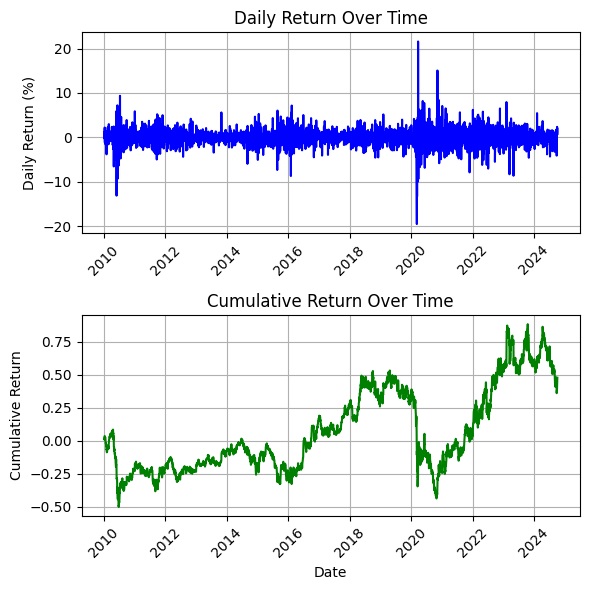

In [8]:
import matplotlib.pyplot as plt

# Step 3: Calculate the cumulative return
df['cumulative_return'] = (1 + df['daily_return'] / 100).cumprod() - 1

# Create subplots for daily return and cumulative return
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6))

# Plot the daily return
ax1.plot(df['datadate'], df['daily_return'], label='Daily Return', color='blue')
ax1.set_title('Daily Return Over Time')
ax1.set_ylabel('Daily Return (%)')
ax1.grid(True)
ax1.tick_params(axis='x', rotation=45)

# Plot the cumulative return
ax2.plot(df['datadate'], df['cumulative_return'], label='Cumulative Return', color='green')
ax2.set_title('Cumulative Return Over Time')
ax2.set_xlabel('Date')
ax2.set_ylabel('Cumulative Return')
ax2.grid(True)
ax2.tick_params(axis='x', rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig("plot22.pdf", format="pdf", bbox_inches="tight")

plt.show()

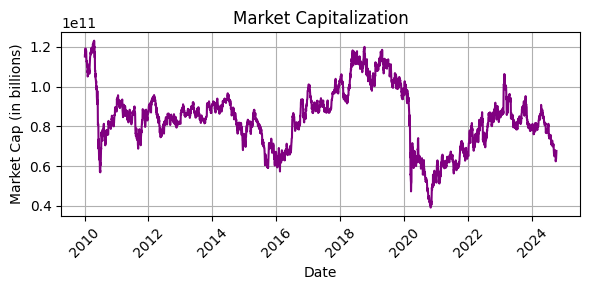

In [9]:
# Plot the market capitalization over time

df["mktcap"] = df["prccd"] * df["cshoc"]

plt.figure(figsize=(6, 3))
plt.plot(df['datadate'], df['mktcap'], label='Market Cap', color='purple')
plt.title('Market Capitalization')
plt.xlabel('Date')
plt.ylabel('Market Cap (in billions)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("plot23.pdf", format="pdf", bbox_inches="tight")

plt.show()